# Double Slit Experiment

An experiment in modern physics to prove that light behaves both as a wave and as a particle. First described by Thomas Young, a coherent light beam passes throught two slits and the interferece pattern is observed on a screen behind these. 

In [81]:
import numpy as np
import matplotlib.pyplot as plt

## Parameters of the wave and the experiment setup

This experiment deals with light as a wave, therefore, we will need the monochromatic plane wave 

$$
E(\mathbf{r}, t) = E_0 e^{i ( \mathbf{k} \cdot \mathbf{r} - \omega t )} 
$$

where:

$\lambda$: the wavelength

$\kappa$: the wavenumber that determines how fast the wave oscillates, and is defined as $\kappa = \frac{2\pi}{\lambda}$

$\omega$: the angular frequency of the wave that determines the EM oscillation $\omega = c\kappa$

As fo the slits we must define the slit separation, width, and screen distance. The slit separation determines the angular separation of the interfering fringes according to

$$
dsin\theta = m\lambda
$$

| Diffraction type | Meaning | Criterion (Fresnel number \(F\)) |
|-----------------|---------|----------------------------------|
| Fresnel (near-field) | Observed **close to the aperture**, wavefront curvature matters | $F = \frac{a^2}{\lambda L} \gtrsim 1$ |
| Fraunhofer (far-field) | Observed **far from the aperture**, wavefronts are planar, pattern is Fourier transform of aperture | $F = \frac{a^2}{\lambda L} \ll 1$ |


In [82]:
wavelength = 500e-9
k = 2 * np.pi / wavelength
c = 3e8
omega = c * k

slit_separation = 50e-6
slit_width = 10e-6
screen_distance = 0.03

N = 3    # Number of slits

slit_positions = (
    np.arange(N) - (N - 1) / 2
) * slit_separation

# Grid setup
x = np.linspace(-4e-3, 4e-3, 1800)   
y = np.linspace(8e-3, screen_distance, 750)
X, Y = np.meshgrid(x, y)



## Slit experiment

Each slit has a finite width $a$, producing a Fraunhofer diffraction envelope:

$$
I_{\rm slit}(x, y) = \left[ \frac{\sin(\beta)}{\beta} \right]^2,
\quad \beta = \frac{k a x}{2 y}
$$

The **amplitude modification** is:

$$
E(x, y) \to E(x, y) \, \sqrt{I_{\rm slit}(x, y)}
$$

The intensity, which is the **physically measured quantity**, is the modulus squared of the total field:

$$
I(x, y) = |E(x, y)|^2
$$

Normalized for visualization:

$$
I_{\rm norm}(x, y) = \frac{I(x, y)}{\max(I)}
$$

In [83]:
E = np.zeros_like(X, dtype=complex)

for x_n in slit_positions:
    r = np.sqrt((X - x_n)**2 + Y**2)
    E += np.exp(1j * k * r) / np.sqrt(r)

# Single-slit envelope
beta = (k * slit_width * X) / (2 * Y)
single_slit = np.sinc(beta / np.pi)**2

E *= np.sqrt(single_slit)

intensity = np.abs(E)**2
intensity /= intensity.max()
phase = np.mod(np.angle(E), 2*np.pi)
intensity_screen = intensity[-1, :]
intensity_screen /= intensity_screen.max()


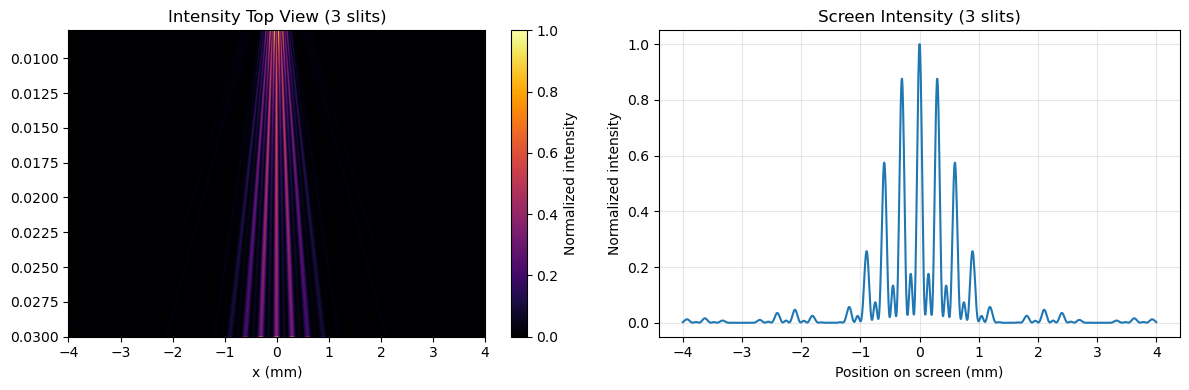

In [84]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.imshow(
    intensity,
    extent=[x.min()*1e3, x.max()*1e3, y.max(), y.min()],
    aspect='auto',
    cmap='inferno'
)

plt.colorbar(label="Normalized intensity")
plt.xlabel("x (mm)")
plt.title(f"Intensity Top View ({N} slits)")

plt.subplot(1,2,2)
plt.subplot(1,2,2)
plt.plot(x * 1e3, intensity_screen, lw=1.5)
plt.xlabel("Position on screen (mm)")
plt.ylabel("Normalized intensity")
plt.title(f"Screen Intensity ({N} slits)")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()